In [5]:
import pandas as pd
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score,mean_squared_error
#%%
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

In [6]:
df = pd.read_csv(r"D:\AI-COURSE\8\insurance.csv")
df.head(5)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [7]:
df.drop(["region"], axis=1, inplace = True)
df.head()

,age,sex,bmi,children,smoker,charges
0,19,female,27.900,0,yes,16884.92400
1,18,male,33.770,1,no,1725.55230
2,28,male,33.000,3,no,4449.46200
3,33,male,22.705,0,no,21984.47061
4,32,male,28.880,0,no,3866.85520


In [8]:
dtypes = df.dtypes
n_uniq = df.nunique()
pd.DataFrame({"Dtypes": dtypes, "Num_Uniqe": n_uniq}).T

,age,sex,bmi,children,smoker,charges
Dtypes,int64,object,float64,int64,object,float64
Num_Uniqe,47,2,548,6,2,1337


In [9]:
cols = ["sex","smoker"]
df[cols] = df[cols].astype('category')
pd.DataFrame(df.dtypes).T

,age,sex,bmi,children,smoker,charges
0,int64,category,float64,int64,category,float64


In [10]:
null = df.isnull().sum()
ratio = null / df.shape[0]
pd.DataFrame({"Null_sum": null, "Ratio": ratio}).T

,age,sex,bmi,children,smoker,charges
Null_sum,0.0,0.0,0.0,0.0,0.0,0.0
Ratio,0.0,0.0,0.0,0.0,0.0,0.0


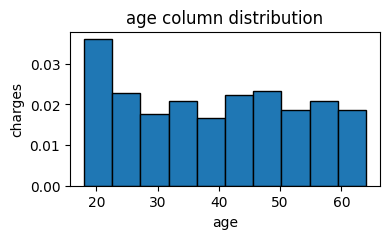

In [11]:

plt.figure(figsize=(4, 2))
plt.hist(df["age"], density=True, edgecolor="black")  
plt.title("age column distribution")
plt.xlabel("age")
plt.ylabel("charges")
plt.show()

Numeric Columns Found: Index(['age', 'bmi', 'children', 'charges'], dtype='object')


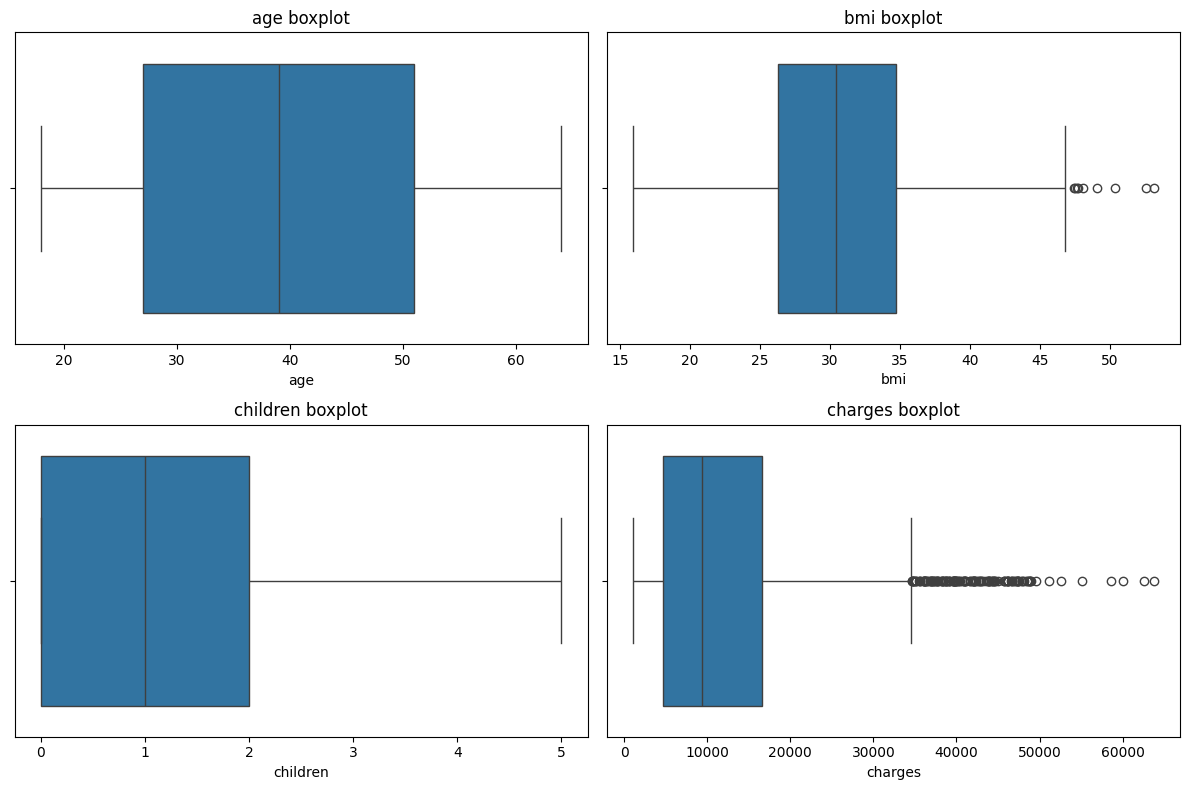

In [12]:
num_cols = df.select_dtypes(include=["int64", "float64"]).columns
print("Numeric Columns Found:", num_cols)

plt.figure(figsize=(12, 8))
for i, col in enumerate(num_cols, 1):
    plt.subplot(2, 2, i)  
    sns.boxplot(x=df[col], orient="h")
    plt.title(f"{col} boxplot")
plt.tight_layout()
plt.show()

In [13]:
for col in num_cols:
    Q1 = df[col].quantile(.25)
    Q3 = df[col].quantile(.75)
    IQR = Q3 - Q1
    Lower_Fence = Q1 - 1.5 * IQR
    Upper_Fence = Q3 + 1.5 * IQR
    Lower_Outliers = df[df[col] < Lower_Fence][col].values
    Upper_Outliers = df[df[col] > Upper_Fence][col].values
    df[col].replace(Lower_Outliers, Lower_Fence, inplace=True)
    df[col].replace(Upper_Outliers, Upper_Fence, inplace=True)

Numeric Columns Found: Index(['age', 'bmi', 'children', 'charges'], dtype='object')


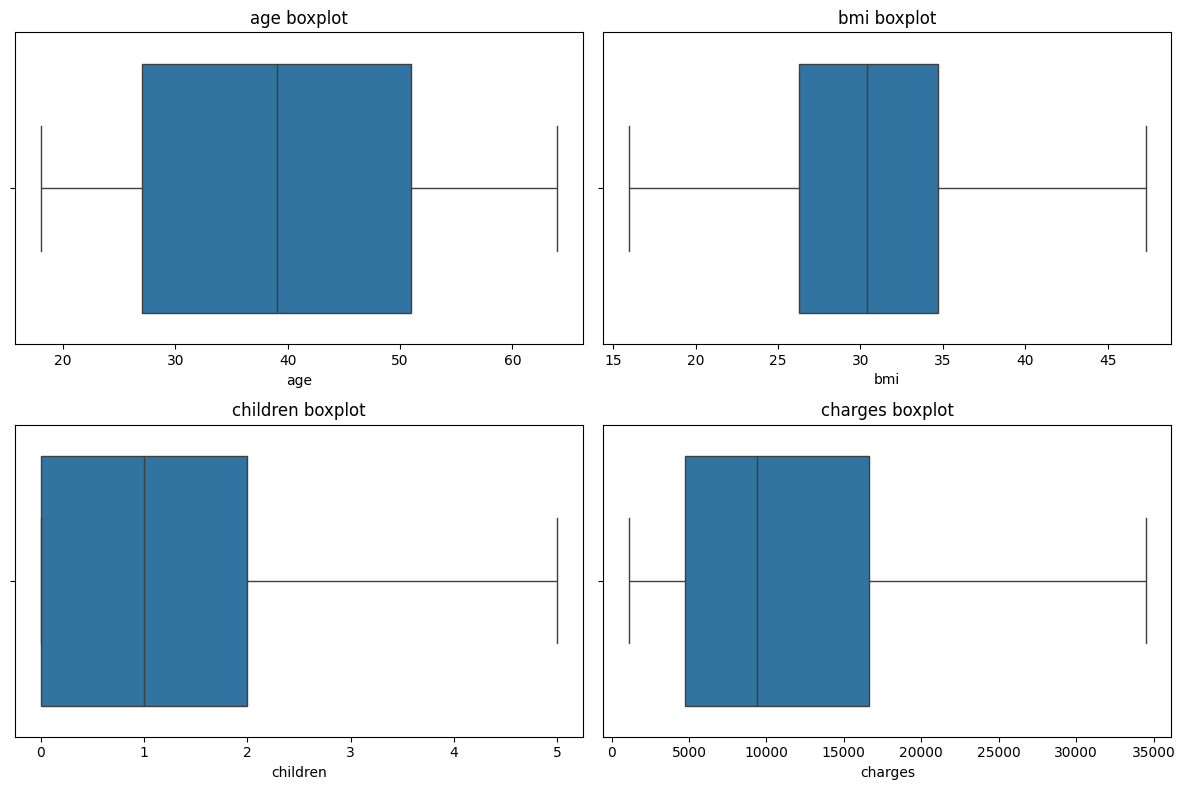

In [ ]:
num_cols = df.select_dtypes(include=["int64", "float64"]).columns
print("Numeric Columns Found:", num_cols)

plt.figure(figsize=(12, 8))
for i, col in enumerate(num_cols, 1):
    plt.subplot(2, 2, i)  
    sns.boxplot(x=df[col], orient="h")
    plt.title(f"{col} boxplot")
plt.tight_layout()
plt.show()

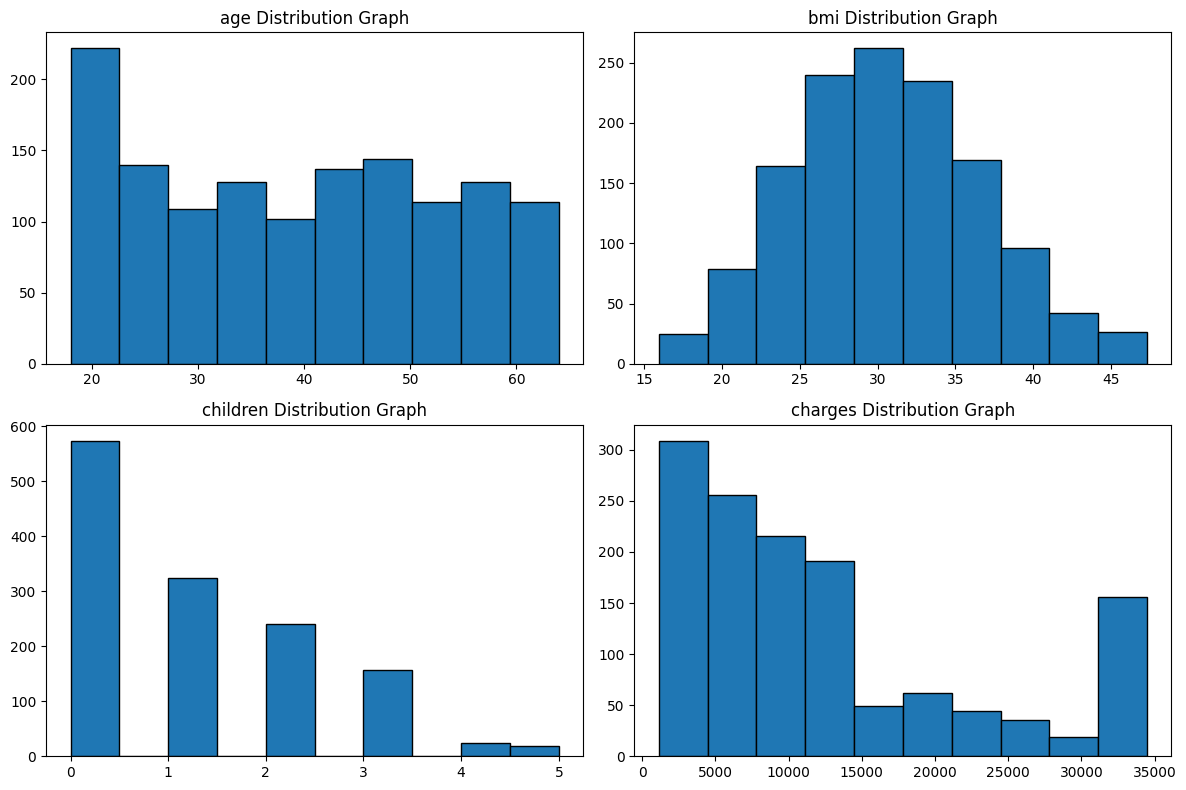

In [14]:
# Histogram
num_cols = df.select_dtypes("number").columns
num_plots = len(num_cols)
rows = (num_plots + 1) // 2  # نحسب عدد الصفوف المطلوبة بحيث نعرض رسمين في كل صف

plt.figure(figsize=(12, 4 * rows))

for i, col in enumerate(num_cols, 1):
    plt.subplot(rows, 2, i)  # نعمل شبكة ديناميكية بعدد الصفوف المحسوبة
    plt.hist(df[col], edgecolor="black")
    plt.title(f"{col} Distribution Graph")

plt.tight_layout()
plt.show()


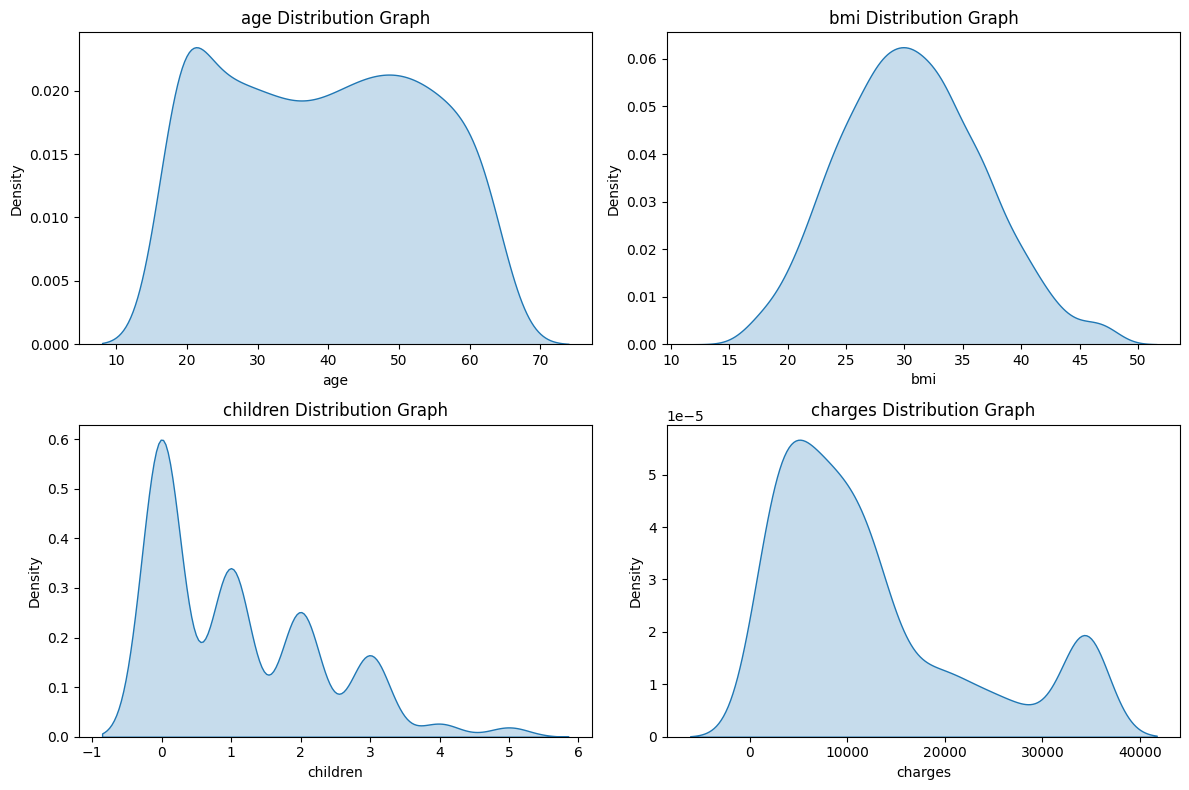

In [80]:
# KDE Plot
num_cols = df.select_dtypes("number").columns
num_plots = len(num_cols)
rows = (num_plots + 1) // 2  # نحسب عدد الصفوف بحيث يكون فيه رسمين في كل صف

plt.figure(figsize=(12, 4 * rows))

for i, col in enumerate(num_cols, 1):
    plt.subplot(rows, 2, i)  # شبكة الرسم الديناميكية
    sns.kdeplot(df[col], fill=True)
    plt.title(f"{col} Distribution Graph")

plt.tight_layout()
plt.show()


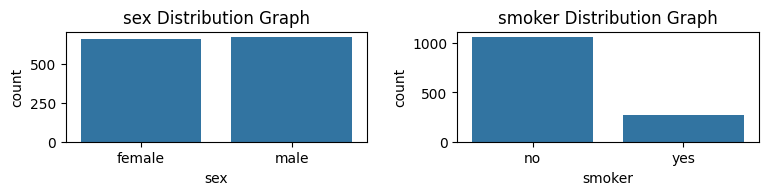

In [15]:
# Count Plot
cat_cols = df.select_dtypes("category").columns
plt.figure(figsize=(14, 4))
for i, col in enumerate(cat_cols):
    plt.subplot(2, 3, i+1)
    sns.countplot(x=col, data=df)
    plt.title(f"{col} Distribution Graph")
plt.subplots_adjust(hspace=.8, wspace=.3)
plt.show()

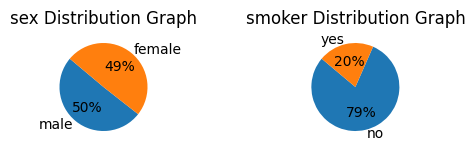

In [107]:
# Pie Plot (not recommended)
cat_cols = df.select_dtypes("category").columns
plt.figure(figsize=(9, 4))
for i, col in enumerate(cat_cols):
    plt.subplot(2, 3, i+1)
    unique = df[col].value_counts()
    count = unique.values
    categories = unique.index
    plt.pie(count, labels = categories, startangle=140, autopct='%1.1d%%')
    plt.title(f"{col} Distribution Graph")
plt.subplots_adjust(hspace=.8, wspace=.3)
plt.show()

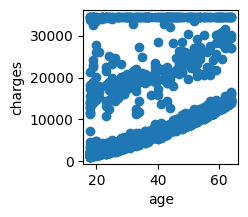

In [109]:
# Scatter Plot
plt.figure(figsize=(2, 2))
plt.scatter(df["age"], df["charges"])
plt.xlabel("age")
plt.ylabel("charges")
plt.show()

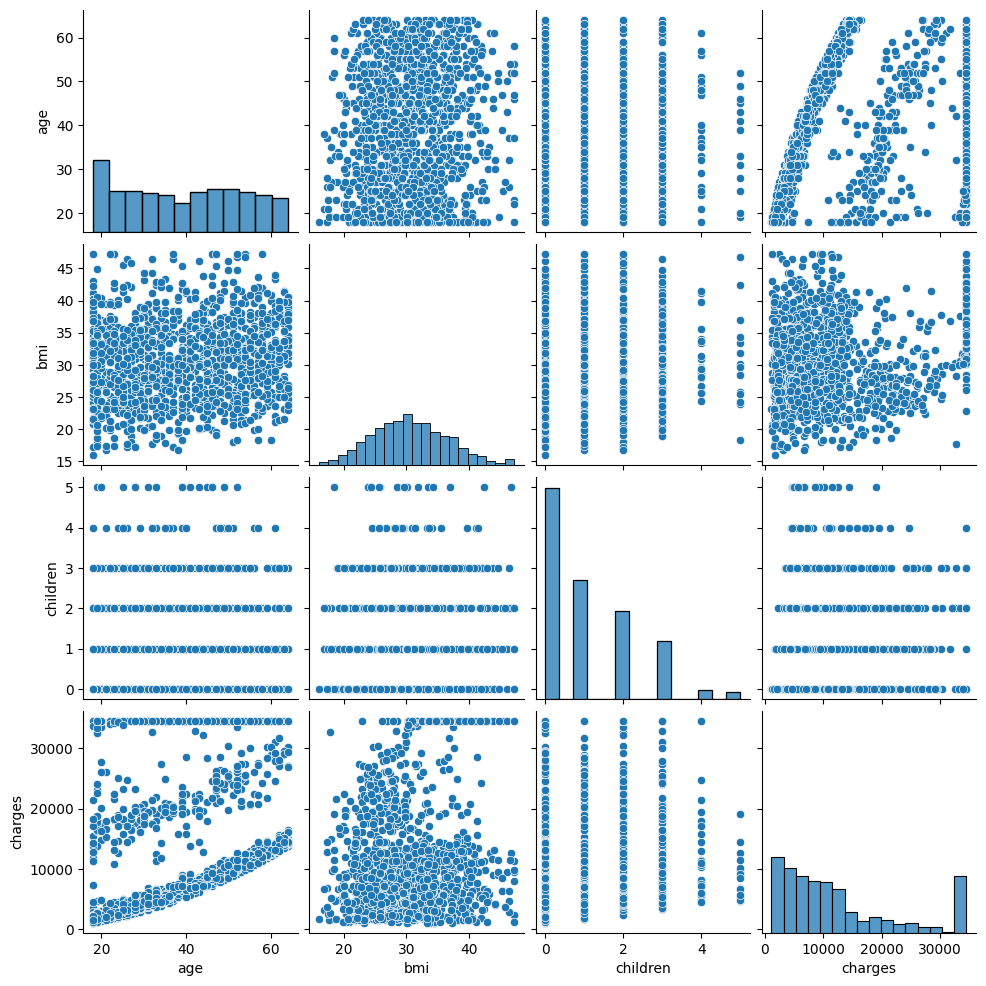

In [110]:
# Pair Plot
sns.pairplot(df)

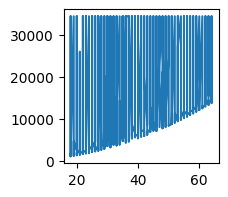

In [16]:
# Line Plot
sorted_df = df.sort_values(by="age")
plt.figure(figsize=(2, 2))
plt.plot(sorted_df["age"], sorted_df["charges"])
plt.show()

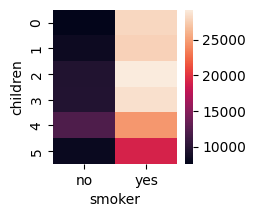

In [17]:
#Heat map
plt.figure(figsize=(2, 2))
agg = df.pivot_table(index="children", columns="smoker", values="charges", aggfunc="mean")
sns.heatmap(agg)
plt.show()

In [18]:
df.duplicated().sum()

np.int64(1)

In [19]:
df.drop_duplicates(inplace=True)

In [20]:
df.duplicated().sum()

np.int64(0)

In [21]:
X = df.drop("charges", axis=1)
y = df[["charges"]]


In [22]:
from sklearn.preprocessing import MinMaxScaler
num_cols = X.select_dtypes("number").columns
scaler = MinMaxScaler()
scaler.fit(X[num_cols])
X[num_cols] = scaler.transform(X[num_cols])

In [24]:
str_cols = ["sex","smoker"]
pd.DataFrame(X[str_cols].nunique()).T

,sex,smoker
0,2,2


In [26]:
from category_encoders import OneHotEncoder
encoder = OneHotEncoder(cols = str_cols, drop_invariant=True)
X = encoder.fit_transform(X)